# Import Libraries

In [26]:
import os 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from itertools import product
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

# Load Data

In [27]:
df = pd.read_csv('./aggregated_df_final01oct2021.csv')
df.shape

(1488, 30)

In [28]:
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,1488,1488.000000,1488.000000,1488.000000,1488.000000,1469.000000,1.488000e+03,1474.000000,1463.000000,1.487000e+03,...,1488.000000,1.488000e+03,1488.000000,1488.000000,1488.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
unique,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14691.645046,15164.850573,14153.097305,14720.756935,14575.538125,3.210472e+07,53.151020,202.328875,1.010305e+08,...,36.472658,5.550080e+04,0.132895,0.352895,0.089066,0.230233,0.129457,0.348837,0.200000,0.091473
std,NaN,14494.863269,14967.645421,13928.197733,14515.367588,14243.105428,6.126127e+07,14.145612,1095.937162,5.868829e+08,...,16.146676,1.064818e+05,0.126408,0.083135,0.062895,0.421145,0.335836,0.476787,0.400155,0.288392
min,NaN,3188.010000,3268.953581,2817.000000,3189.020000,3500.468075,1.799570e+02,10.494657,-5072.114792,-2.322863e+09,...,18.409581,2.827780e+03,-0.367350,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6611.015810,6743.491250,6469.037551,6612.410083,6636.765491,5.872377e+05,43.797567,-184.030871,-3.131900e+07,...,24.683816,7.575363e+03,0.062371,0.296959,0.051407,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,8992.422500,9225.881250,8726.426583,9013.879800,9082.240621,3.147183e+06,51.963991,42.926289,1.159403e+05,...,27.773565,1.125902e+04,0.135434,0.341305,0.082179,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,12250.759375,13110.385000,11644.186875,12310.700626,12052.165768,2.643456e+07,62.773309,431.057389,2.695461e+08,...,52.146398,9.349144e+04,0.211749,0.404888,0.122015,0.000000,0.000000,1.000000,0.000000,0.000000


In [29]:
df.head(2)

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
0,2021-05-04,56969.07375,57125.56250,53079.47,53180.3850,55412.979500,2.253815e+08,43.926106,-420.528413,8.327447e+06,...,45.287975,58210.414847,0.231400,0.334341,0.061957,0.0,0.0,0.0,1.0,0.0
1,2021-05-05,53179.55875,57984.46625,52905.10,57430.7975,55126.953625,2.135901e+08,53.288264,-221.647875,2.214027e+08,...,52.213717,93897.589556,0.059515,0.285068,0.079156,0.0,0.0,0.0,0.0,1.0


In [30]:
df.head(2).transpose()

,0,1
time,2021-05-04,2021-05-05
open_x,56969.1,53179.6
high_x,57125.6,57984.5
low_x,53079.5,52905.1
close_x,53180.4,57430.8
Basis_x,55413,55127
Volume_x,2.25382e+08,2.1359e+08
RSI_x,43.9261,53.2883
MACD_x,-420.528,-221.648
OnBalanceVolume_x,8.32745e+06,2.21403e+08


# Extract relevant features
 - set the 'time' column as index of the data
 - extract relevant features for time series analysis

In [31]:
df = df.set_index('time')
df.head(2)

,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,btc_dom,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
time,,,,,,,,,,,,,,,,,,,,,
2021-05-04,56969.07375,57125.56250,53079.47,53180.3850,55412.979500,2.253815e+08,43.926106,-420.528413,8.327447e+06,47.051815,...,45.287975,58210.414847,0.231400,0.334341,0.061957,0.0,0.0,0.0,1.0,0.0
2021-05-05,53179.55875,57984.46625,52905.10,57430.7975,55126.953625,2.135901e+08,53.288264,-221.647875,2.214027e+08,46.368421,...,52.213717,93897.589556,0.059515,0.285068,0.079156,0.0,0.0,0.0,0.0,1.0


In [32]:
df = df.loc[:,['close_x', 'btc_s2f', 'btc_s2f_price']]
df.head(5)

,close_x,btc_s2f,btc_s2f_price
time,,,
2021-05-04,53180.38500,45.287975,58210.414847
2021-05-05,57430.79750,52.213717,93897.589556
2021-05-06,56398.11875,48.223643,71887.239253
2021-05-07,57313.31875,47.665643,69130.305414
2021-05-08,58863.54875,47.947129,70511.590316


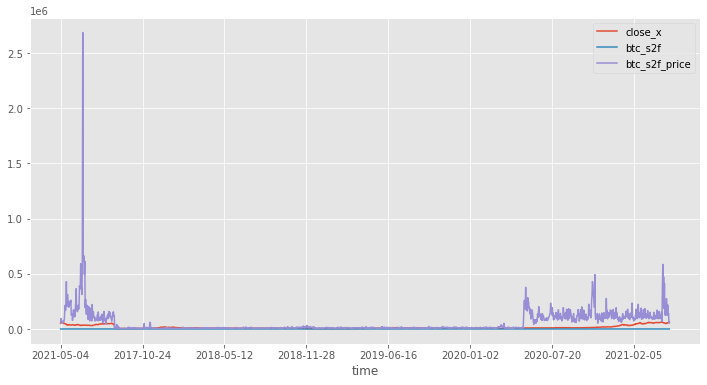

In [33]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (12,6))

In [34]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)
df.head(5)

,close_x,btc_s2f,btc_s2f_price
time,,,
2021-05-04,53180.38500,45.287975,58210.414847
2021-05-05,57430.79750,52.213717,93897.589556
2021-05-06,56398.11875,48.223643,71887.239253
2021-05-07,57313.31875,47.665643,69130.305414
2021-05-08,58863.54875,47.947129,70511.590316


# Resampling
 - daily frequency
 - monthly frequency
 - annual frequency
 - quarterly frequency

In [35]:
# Resampling to daily frequency
df_day = df.resample('D').mean()
# df_day = df.groupby(df.index).mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_quarter = df.resample('Q-DEC').mean()

In [36]:
len(df_day.close_x)

1488

In [37]:
# # temporary check
# pd.Series(df_day.close_x.isnull().index).apply(lambda x: x.year).value_counts().sum()

In [38]:
display(df_day.head(3), df_month.head(3), df_year.head(3), df_quarter.head(3))

,close_x,btc_s2f,btc_s2f_price
time,,,
2017-08-17,4285.08,20.219069,3874.856716
2017-08-18,4108.37,24.292762,7179.604986
2017-08-19,4139.98,23.973744,6867.689316


,close_x,btc_s2f,btc_s2f_price
time,,,
2017-08-31,4285.871333,27.805166,13642.886482
2017-09-30,4070.054667,22.828718,6292.699384
2017-10-31,5303.580241,24.169941,8400.741907


,close_x,btc_s2f,btc_s2f_price
time,,,
2017-12-31,7590.829883,24.376646,8631.531608
2018-12-31,7537.615017,25.464604,8916.735960
2019-12-31,7364.168186,26.488004,9960.898096


,close_x,btc_s2f,btc_s2f_price
time,,,
2017-09-30,4141.993556,24.487534,8742.761750
2017-12-31,9277.760696,24.322407,8577.125560
2018-03-31,10451.467769,23.833785,6982.474043


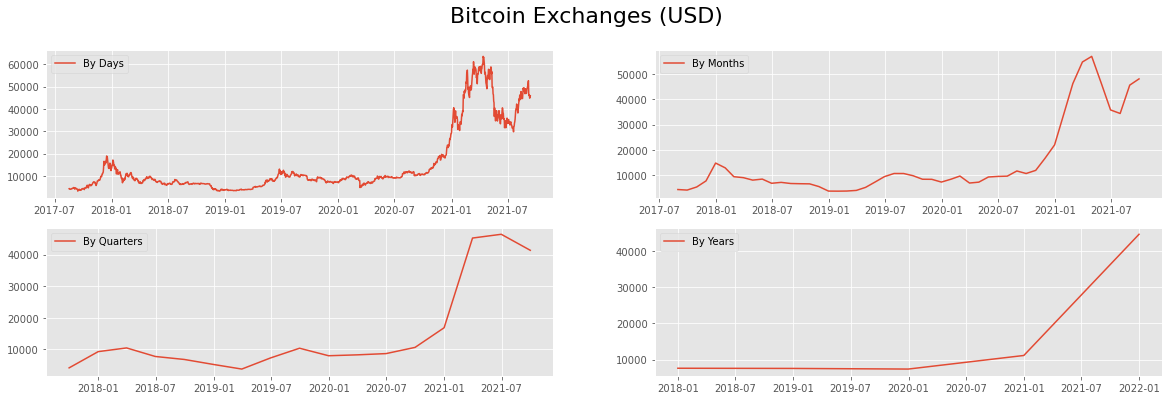

In [39]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(221)
plt.plot(df_day.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quarter.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

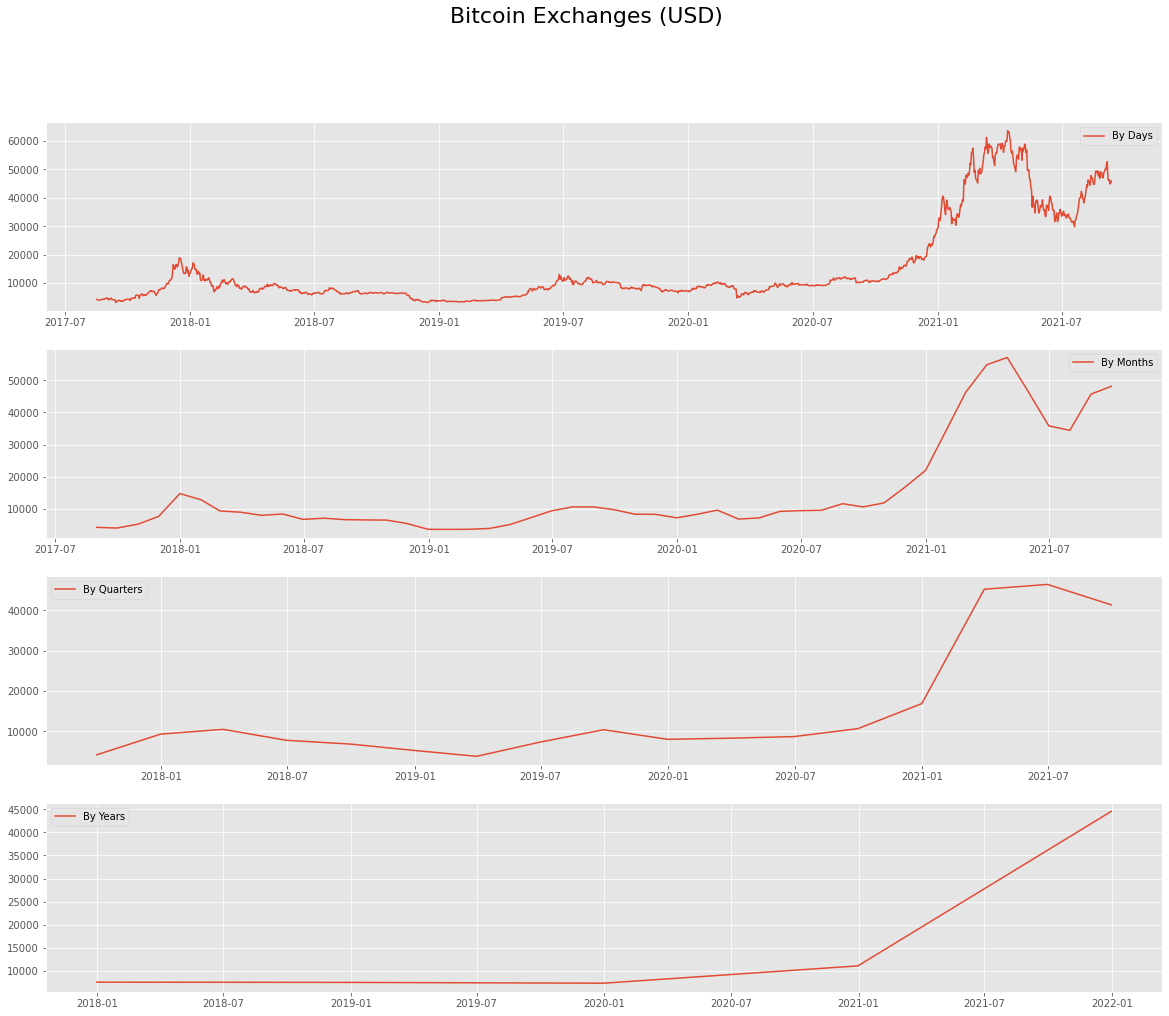

In [40]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,16])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(411)
plt.plot(df_day.close_x, '-', label='By Days')
plt.legend()

plt.subplot(412)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(413)
plt.plot(df_quarter.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(414)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

# Check Stationarity

Dickey–Fuller test: p=0.893560


<Figure size 864x432 with 0 Axes>

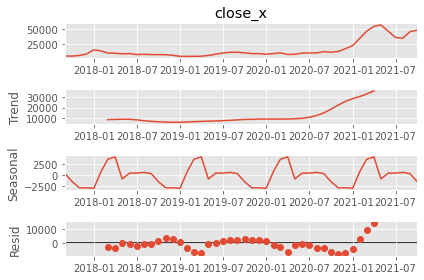

In [41]:
# Checking Stationarity 
plt.figure(figsize=(12,6))
sm.tsa.seasonal_decompose(df_month.close_x).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()

From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

In [43]:
df_month.close_x.min()

3643.8625379032255

## minmax norm

In [44]:
s_mm = df_month.close_x.apply(lambda x: ( x - min(df_month.close_x) + 100 ) / ( max(df_month.close_x) - min(df_month.close_x)  ) )
s_mm

time
2017-08-31    0.013890
2017-09-30    0.009850
2017-10-31    0.032941
2017-11-30    0.077837
2017-12-31    0.210274
2018-01-31    0.174884
2018-02-28    0.109214
2018-03-31    0.101874
2018-04-30    0.083760
2018-05-31    0.091404
2018-06-30    0.060315
2018-07-31    0.067011
2018-08-31    0.058602
2018-09-30    0.057073
2018-10-31    0.056040
2018-11-30    0.035907
2018-12-31    0.002374
2019-01-31    0.001872
2019-02-28    0.002729
2019-03-31    0.007409
2019-04-30    0.030007
2019-05-31    0.070108
2019-06-30    0.109718
2019-07-31    0.132914
2019-08-31    0.132713
2019-09-30    0.116689
2019-10-31    0.090296
2019-11-30    0.089671
2019-12-31    0.069317
2020-01-31    0.090492
2020-02-29    0.114006
2020-03-31    0.062135
2020-04-30    0.068679
2020-05-31    0.106898
2020-06-30    0.111156
2020-07-31    0.113222
2020-08-31    0.151576
2020-09-30    0.132866
2020-10-31    0.156108
2020-11-30    0.245497
2020-12-31    0.345092
2021-01-31    0.583575
2021-02-28    0.799933
2021-0

In [45]:
df_month['close_x'] = s_mm

In [46]:
df_month.head()

,close_x,btc_s2f,btc_s2f_price
time,,,
2017-08-31,0.013890,27.805166,13642.886482
2017-09-30,0.009850,22.828718,6292.699384
2017-10-31,0.032941,24.169941,8400.741907
2017-11-30,0.077837,25.967179,11269.575772
2017-12-31,0.210274,22.883158,6147.912234


Dickey–Fuller test: p=0.296837


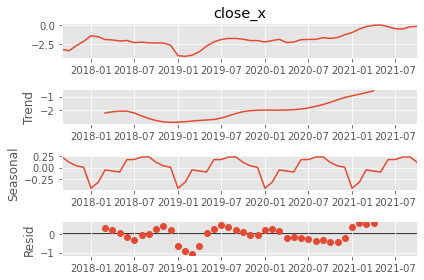

In [47]:
# Box-Cox Transformations & Checking Stationarity 
df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

In [ ]:
# Box-Cox Transformations & Checking Stationarity 
df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

Time series data still not stationary

In [ ]:
df_month.close_x.hist()

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df_month.close_x #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()   # max - min / ... 
x_scaled = min_max_scaler.fit_transform(x.values.reshape(-1,1))
dff = pd.DataFrame(x_scaled)
dff[0].hist()

In [ ]:
# Box-Cox Transformations & Checking Stationarity 
# after minmax norm.
s_mm, lmbda = stats.boxcox(s_mm)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(s_mm))
sm.tsa.seasonal_decompose(s_mm).plot();

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df_month.close_x #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()   # max - min / ... 
x_scaled = min_max_scaler.fit_transform(x.values.reshape(-1,1))
dff = pd.DataFrame(x_scaled)
dff[0].hist()

In [ ]:
dff

# Initial approximation
 - Autocorrelation
 - Partial Autocorrelation Plots

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, ax=ax)

plt.tight_layout()
plt.show()

As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. Hence, for BTC close values the order of AR models is one.

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(len(parameters_list))

In [ ]:
# Model Selection

results = []
best_aic = float("inf")

for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, enforce_stationarity=False, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
    
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
# display(result_table.sort_values(by = 'aic', ascending=True).head())
# display(best_model.summary())

In [ ]:
# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [ ]:
# Best Models
result_table =a pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
display(result_table.sort_values(by = 'aic', ascending=True).head())
display(best_model.summary())

In [ ]:
# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [ ]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [ ]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(12,6))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


# Evaluation

In [ ]:
df_month2.head(5)

In [ ]:
df_month2[['close_x', 'forecast']].dropna().head(5)

In [ ]:
df_month2[df_month2['close_x'].isnull()]

In [ ]:
df_month2[df_month2['forecast'].isnull()]

In [ ]:
df_month3 = df_month2[['close_x', 'forecast']].dropna()
s_a = df_month3['close_x']
s_b = df_month3['forecast']

mean_squared_error(s_a.values, s_b.values)

# Daily (same work)

In [ ]:
df_day.head(10)

In [ ]:
# Checking Stationarity 
plt.figure(figsize=(12,6))
sm.tsa.seasonal_decompose(df_day.close_x, freq=1).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_day.close_x)[1])
plt.show()

# Box-Cox Transformations & Checking Stationarity 
df_day['close_x'], lmbda = stats.boxcox(df_day.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_day.close_x)[1])
sm.tsa.seasonal_decompose(df_day.close_x, freq=1).plot();
plt.show()

# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_day.close_x, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_day.close_x, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(len(parameters_list))

# Model Selection

results = []
best_aic = float("inf")

In [ ]:
parameters_list[0:10]

In [ ]:
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_day.close_x, 
                                        order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 365)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
    
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
# display(result_table.sort_values(by = 'aic', ascending=True).head())
# display(best_model.summary())



# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

# Quarterly (same work)

In [ ]:
df_quarter.head(2)

In [ ]:
# Checking Stationarity 
plt.figure(figsize=(12,6))
sm.tsa.seasonal_decompose(df_quarter.close_x, freq=1).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_quarter.close_x)[1])
plt.show()

# Box-Cox Transformations & Checking Stationarity 
df_quarter['close_x'], lmbda = stats.boxcox(df_quarter.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_quarter.close_x)[1])
sm.tsa.seasonal_decompose(df_quarter.close_x, freq=1).plot();
plt.show()

# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_quarter.close_x, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_quarter.close_x, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(len(parameters_list))

# Model Selection

results = []
best_aic = float("inf")

In [ ]:
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_quarter.close_x, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
    
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
# display(result_table.sort_values(by = 'aic', ascending=True).head())
# display(best_model.summary())



# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

# Yearly (Same)

In [ ]:
df_year

In [ ]:
# Checking Stationarity 
plt.figure(figsize=(12,6))
sm.tsa.seasonal_decompose(df_year.close_x, freq=1).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_year.close_x)[1])
plt.show()

# Box-Cox Transformations & Checking Stationarity 
df_year['close_x'], lmbda = stats.boxcox(df_year.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_year.close_x)[1])
sm.tsa.seasonal_decompose(df_year.close_x, freq=1).plot()
plt.show()

# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_year.close_x, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_year.close_x, ax=ax)

plt.tight_layout()
plt.show()


In [ ]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(len(parameters_list))


In [ ]:
# Model Selection

results = []
best_aic = float("inf")


for param in parameters_list:
    try:   
        model=sm.tsa.statespace.SARIMAX(df_year.close_x, 
                                        order=(param[0], y, param[1]), seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
    
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
# display(result_table.sort_values(by = 'aic', ascending=True).head())
# display(best_model.summary())


In [ ]:
best_model.resid[:]

In [ ]:
# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid.plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values[:].squeeze(), lags=2, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [ ]:
df_year

In [ ]:
df_year2 = df_year[['close_x']]
df_year2.close_x = df_year2.close_x.apply(lambda x: invboxcox(x, lmbda))

# year pred
date_list = [datetime(2020, 12, 31), datetime(2021, 12, 31), datetime(2022, 12, 31), datetime(2023, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_year.columns)
df_year2 = pd.concat([df_year2, future])
df_year2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)

plt.figure(figsize=(12,6))
df_year2.close_x.plot()
df_year2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [ ]:
df_year2 = df_year2[['close_x', 'forecast']].dropna()
s_a = df_year2['close_x']
s_b = df_year2['forecast']
mean_squared_error(s_a.values, s_b.values)

# gc

### Graphing
 - only without null

In [ ]:
plt.figure(figsize=(12,6))
df_month3.close_x.plot()

In [ ]:
plt.figure(figsize=(12,6))
df_month3.close_x.plot()
df_month3.forecast.plot(color='b', ls='--', label='Predicted Close Price')

In [ ]:
df_month3.forecast.describe()

In [ ]:
df_month3.forecast.sort_values(ascending=False)

In [ ]:
df_month4 = df_month3[df_month3['forecast']!=max(df_month3.forecast)]
df_month4.head(5)

In [ ]:
plt.figure(figsize=(12,6))
df_month4.close_x.plot()
df_month4.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [ ]:
df